<a href="https://colab.research.google.com/github/kaiamj/bdrp/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/instadeepai/jumanji.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/instadeepai/jumanji.git to /tmp/pip-req-build-gvmwsorx
  Running command git clone -q https://github.com/instadeepai/jumanji.git /tmp/pip-req-build-gvmwsorx
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 85 kB 4.3 MB/s 
     |████████████████████████████████| 21.8 MB 1.4 MB/s 
     |████████████████████████████████| 372 kB 79.0 MB/s 
     |████████████████████████████████| 9.4 MB 53.2 MB/s 
     |████████████████████████████████| 3.2 MB 54.1 MB/s 
     |████████████████████████████████| 154 kB 82.1 MB/s 
     |████████████████████████████████| 125 kB 83.6 MB/s 
     |████████████████████████████████| 669 kB 75.9 MB/s 
     |████████████████████████████████| 1.2 MB 61.5 MB/s 
     |████████████████████████████████| 189 kB 74.1 MB/s 
     |█████

In [10]:
import jax
import jax.numpy as jnp
import jumanji
from jumanji.wrappers import AutoResetWrapper
key = jax.random.PRNGKey(0)
env = jumanji.make("BinPack-toy-v0")
state, timestep = env.reset(0)
# Randomly choose ems_id and item_id using the action mask

num_ems, num_items = env.action_spec().num_values
ems_item_id = jax.random.choice(
    key=key,
    a=num_ems * num_items,
    p=timestep.observation.action_mask.flatten(),
)
ems_id, item_id = jnp.divmod(ems_item_id, num_items)

#Wrap the action as a jax array of shape (2,)
action = jnp.array([ems_id, item_id])
state, timestep = env.step(state, action)
print(timestep.reward)

/usr/local/lib/python3.8/dist-packages/jax/_src/numpy/lax_numpy.py:173: UserWarning: Explicitly requested dtype float64 requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
/usr/local/lib/python3.8/dist-packages/jax/_src/ops/scatter.py:87: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=float32 to dtype=int32. In future JAX releases this will result in an error.
  warnings.warn("scatter inputs have incompatible types: cannot safely cast "
/usr/local/lib/python3.8/dist-packages/jax/_src/ops/scatter.py:87: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=float32 to dtype=int32. In future JAX releases this will result in an error.
  warnings.warn("scatter inputs have i

0.0


In [46]:
np.array(timestep.reward.flatten())[0]

0.0

In [2]:
import numpy as np
# import chex
# import jax.numpy as jnp

In [8]:
### use to flatten to observation 
def flatten(obs):
  p=[]  # obs = timestep.observation 
  p = np.append(obs.ems.x1,obs.ems.x2)
 #p = np.append(p,obs.ems.x2)
  p = np.append(p,obs.ems.y1)
  p = np.append(p,obs.ems.y2)
  p = np.append(p,obs.ems.z1)
  p = np.append(p,obs.ems.z2)
  p = np.append(p,obs.ems_mask.flatten())
  p = np.append(p,obs.items.x_len)
  p = np.append(p,obs.items.y_len)
  p = np.append(p,obs.items.z_len)
  p = np.append(p,obs.items_mask.flatten())
  p = np.append(p,obs.items_placed.flatten())
  return p 

In [11]:
p = flatten(timestep.observation)

In [12]:
p.shape

(380,)

In [6]:
type(timestep.observation)

jumanji.environments.combinatorial.binpack.types.Observation

In [7]:
timestep.observation.action_mask.flatten().shape

(800,)

In [ ]:
env.action_spec()

In [ ]:
env.observation_spec()

In [56]:
p.shape[0]

420

In [ ]:
#flatten observation  p = flatten(timestep.observation)
# inside critic and actor by converting it to np.array(p) by actor you will get action

In [61]:
model1 = FeedForwardNN(p.shape[0],800)
p1 = model1.forward(np.array(p))


inside tensor


In [62]:
model2 = FeedForwardNN(p.shape[0],1)
critic = model2.forward(np.array(p))

inside tensor


In [63]:
critic

tensor([0.], grad_fn=<ReluBackward0>)

In [64]:
p1

tensor([7.3258e-02, 4.7905e-03, 1.4326e-01, 8.5431e-02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0771e-01, 2.3255e-02, 9.9250e-02, 7.8145e-02, 7.6100e-02,
        0.0000e+00, 2.0643e-01, 0.0000e+00, 6.3144e-02, 7.6659e-02, 0.0000e+00,
        0.0000e+00, 5.3319e-02, 2.9052e-01, 0.0000e+00, 1.1991e-01, 2.0213e-01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 5.0750e-02, 2.5038e-01, 7.0100e-02,
        0.0000e+00, 9.5201e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.2684e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        7.5674e-02, 2.9135e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.9981e-01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5849e-01, 2.9518e-02, 0.0000e+00,
        9.9162e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.8625e-01, 1.6340e-01,
        0.0000e+00, 0.0000e+00, 1.0939e-01, 2.2355e-02, 0.0000e+00, 1.7597e-01,
        1.5238e-01, 4.5492e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.5950e-02,
        0.0000e+00, 1.7501e-01, 0.0000e+

In [65]:
p1.shape

torch.Size([800])

In [18]:
import pandas as pd
action_mask = timestep.observation.action_mask.flatten()


In [32]:
action_tensor = torch.tensor(np.array(action_mask),dtype=torch.int)

In [33]:
indices = torch.nonzero(action_tensor)  #getting valid indicies 

In [ ]:
import pandas as pd
action_mask = timestep.observation.action_mask.flatten()
action_tensor = torch.tensor(np.array(action_mask),dtype=torch.int)
indices = torch.nonzero(action_tensor)  #getting valid indicies 
p2 = p1[indices] # getting proper valid action probablities 

In [34]:
indices

tensor([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19],
        [22],
        [23],
        [24],
        [26],
        [28],
        [29],
        [30],
        [32],
        [34],
        [35],
        [36],
        [37],
        [38],
        [39],
        [40],
        [41],
        [42],
        [44],
        [45],
        [47],
        [48],
        [50],
        [52],
        [53],
        [54],
        [57],
        [58]])

In [35]:
action_tensor[indices]

tensor([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=torch.int32)

In [72]:
p2 = p1[indices] # getting proper valid action probablities 

In [107]:
p1[indices]

tensor([[0.0733],
        [0.0048],
        [0.1433],
        [0.0854],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.1077],
        [0.0233],
        [0.0992],
        [0.0781],
        [0.0000],
        [0.2064],
        [0.0000],
        [0.0631],
        [0.0767],
        [0.0000],
        [0.0000],
        [0.0533],
        [0.1199],
        [0.2021],
        [0.0000],
        [0.0000],
        [0.2504],
        [0.0701],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0627],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0757],
        [0.0000],
        [0.0000],
        [0.1998],
        [0.0000],
        [0.0000],
        [0.0295],
        [0.0000],
        [0.0992],
        [0.0000],
        [0.1862]], grad_fn=<IndexBackward0>)

In [42]:
from torch.distributions import Categorical


In [90]:
p1.shape

torch.Size([800])

In [93]:
p2.shape

torch.Size([46, 1])

In [96]:
p2= torch.reshape(p2,(-1,))  # reshapping it to make it 1D

In [115]:
m = Categorical( logits = p2) #logits un-normalized probablities 
a=m.sample() #actions
m.log_prob(a) # softmax probablity of that action

tensor(-3.8186, grad_fn=<SqueezeBackward1>)

In [118]:
m.logits

tensor([-3.8081, -3.8765, -3.7381, -3.7959, -3.8813, -3.8813, -3.8813, -3.7736,
        -3.8581, -3.7821, -3.8032, -3.8813, -3.6749, -3.8813, -3.8182, -3.8047,
        -3.8813, -3.8813, -3.8280, -3.7614, -3.6792, -3.8813, -3.8813, -3.6309,
        -3.8112, -3.8813, -3.8813, -3.8813, -3.8813, -3.8186, -3.8813, -3.8813,
        -3.8813, -3.8813, -3.8813, -3.8056, -3.8813, -3.8813, -3.6815, -3.8813,
        -3.8813, -3.8518, -3.8813, -3.7821, -3.8813, -3.6951],
       grad_fn=<SubBackward0>)

In [120]:
a.item() 

29

In [122]:
indices[a.item()].item() # valid action value 

tensor([36])

In [ ]:
# # X = torch.tensor([0.1, 0.5, -1.0, 0, 1.2, 0])
# mask = action_mask == True
# mask
# tensor([1, 1, 0, 1, 1, 1], dtype=torch.uint8)

# >>> indices = torch.nonzero(mask)
# >>> indices
# tensor([[0],
#         [1],
#         [3],
#         [4],
#         [5]])

# >>> X[indices]
# tensor([[0.1000],
#         [0.5000],
#         [0.0000],
#         [1.2000],
#         [0.0000]])

In [4]:
import torch
from torch import nn
import torch.nn.functional as F
import numpy as np
class FeedForwardNN(nn.Module):
  def __init__(self):
    super(FeedForwardNN, self).__init__()
  def __init__(self, in_dim, out_dim):
    super(FeedForwardNN, self).__init__()
    self.layer1 = nn.Linear(in_dim, 64)
    self.layer2 = nn.Linear(64, out_dim)
    #self.layer3 = nn.Softmax()
  def forward(self, obs):
  # Convert observation to tensor if it's a numpy array
    if isinstance(obs, np.ndarray):
      obs = torch.tensor(obs, dtype=torch.float)
      print("inside tensor")
  
    activation1 = F.relu(self.layer1(obs))
    output = F.relu(self.layer2(activation1))
    #output = self.layer3(activation2)
    return output

In [ ]:
ems_item_id

DeviceArray(11, dtype=int32)

In [ ]:
action

DeviceArray([ 0, 11], dtype=int32)

In [ ]:
l = [ 0.25, 0.25, 0.25, 0.25 ]

In [ ]:
import torch
from torch.distributions import MultivariateNormal,Categorical
m = Categorical(torch.tensor(l))
m.sample()

tensor(3)

In [ ]:
l[3]

0.25

our initial policy, or actor, parameters and value function, or critic, parameters.

## PPO

In [13]:
from torch.distributions import MultivariateNormal,Categorical
from torch.optim import Adam
import pandas as pd

class PPO:
  def __init__(self,env):
    self._init_hyperparameters()
    self.env = env
    #####################################
    self.obs_dim = 380
    self.act_dim = 800
    ######################################
    

    #initiate actor and critic
    self.actor = FeedForwardNN(self.obs_dim,self.act_dim)
    self.critic = FeedForwardNN(self.obs_dim,1)

      # Create our variable for the matrix.
    # Note that I chose 0.5 for stdev arbitrarily.
    self.cov_var = torch.full(size=(self.act_dim,), fill_value=0.5)
    
    # Create the covariance matrix
    self.cov_mat = torch.diag(self.cov_var)
    self.actor_optim = Adam(self.actor.parameters(), lr=self.lr)
    self.critic_optim = Adam(self.critic.parameters(), lr=self.lr)
    
    
  def _init_hyperparameters(self):
    # Default values for hyperparameters, will need to change later.
    self.timesteps_per_batch = 2  #4800            # timesteps per batch
    self.max_timesteps_per_episode = 1600      # timesteps per episode
    self.gamma = 0.95
    self.n_updates_per_iteration = 5
    self.clip = 0.2 # As recommended by the paper
    self.lr = 0.005

  def compute_rtgs(self, batch_rews): 
    # The rewards-to-go (rtg) per episode per batch to return.
    # The shape will be (num timesteps per episode)
    batch_rtgs = []
    print("batch_rewards ",batch_rews)
    # Iterate through each episode backwards to maintain same order
    # in batch_rtgs
    for ep_rews in reversed(batch_rews):
      discounted_reward = 0 # The discounted reward so far
      for rew in reversed(ep_rews):
        discounted_reward = rew + discounted_reward * self.gamma
        batch_rtgs.insert(0, discounted_reward)
    # Convert the rewards-to-go into a tensor
    print("discounted reward of batch", batch_rtgs)
    batch_rtgs = torch.tensor(batch_rtgs, dtype=torch.float)
    return batch_rtgs

  def get_action(self,obs,action_tensor):
    #flatten observation  p = flatten(timestep.observation)
    # inside critic and actor by converting it to np.array(p) by actor you will get action
     p1 = self.actor(obs)
     indices = torch.nonzero(action_tensor)  #getting valid indicies 
     p2 = p1[indices] # getting proper valid action probablities
     p2= torch.reshape(p2,(-1,))  # reshapping it to make it 1D
     probs = Categorical( logits = p2) #logits un-normalized probablities 
     a=probs.sample() #actions
     print("in get_action , shape of valid probs", p2.shape)
     # probs.log_prob(a) # softmax probablity of that action
     action_id = indices[a.item()].item()  # valid action value 
     return action_id, a, probs.log_prob(a)  

    #  ind = action_mask.index[[action_mask[0] == True]]
    #  df = pd.DataFrame(p1.detach().numpy())
    #  probs = Categorical(probs=torch.tensor(list(df.iloc[ind][0])))
    #  action = probs.sample()
    #  action_id = df.iloc[ind][0][action].index
     


   
  def rollout(self):
    # Batch data
    batch_obs = []             # batch observations
    batch_acts = []            # batch actions
    batch_log_probs = []       # log probs of each action
    batch_rews = []            # batch rewards
    batch_rtgs = []            # batch rewards-to-go
    batch_lens = []            # episodic lengths in batch
    # Number of timesteps run so far this batch
    t = 0 
    while t < self.timesteps_per_batch:
      # Rewards this episode
      ep_rews = []
      key = jax.random.PRNGKey(0)
      ###############################
      #jax.jit(env.reset)(key)
      state, timestep = self.env.reset(key)
      ###############################
      ep_t = 0
      rew = 0.0
      #for ep_t in range(self.max_timesteps_per_episode):
      while rew == 0.0:
        # Increment timesteps ran this batch so far
        t += 1
        # Collect observation
        ################################################
        obs = flatten(timestep.observation)
        #obs = torch.tensor(obs, dtype=torch.float)
        batch_obs.append(obs)
        
        num_ems, num_items = env.action_spec().num_values
        action_mask = timestep.observation.action_mask.flatten()
        action_tensor = torch.tensor(np.array(action_mask),dtype=torch.int)
         
        
        #----------------------------------------------- get from NN
        #ems_item_id = self.get_action(obs,action_mask)
        ems_item_id, action_,log_prob  = self.get_action(obs,action_tensor)
        # -------------------------------------------------
        ems_id, item_id = jnp.divmod(ems_item_id, num_items)

        # Wrap the action as a jax array of shape (2,)
        action = jnp.array([ems_id, item_id])

        #action = torch.tensor(action, dtype=torch.float)
        #ems_item_id, action_,log_prob  = self.get_action(obs,action_mask)
        #mean = self.actor(obs)
        #dist = MultivariateNormal(mean, self.cov_mat)
        #log_prob = dist.log_prob(action)

        state,timestep = self.env.step(state, action)
        rew = np.array(timestep.reward.flatten())[0]
        ##################################################
        # Collect reward, action, and log prob
        ep_rews.append(rew)
        print("reward ", rew)
        batch_acts.append(action_)
        
        print("action_  ",action_)
        batch_log_probs.append(log_prob)
        print("log_probs ", log_prob)
        ep_t += 1
      # Collect episodic length and rewards
      print("end of episode")
      batch_lens.append(ep_t + 1) # plus 1 because timestep starts at 0
      print("episode length  ," , ep_t+1)
      batch_rews.append(ep_rews) 
      print("episode rewards ", ep_rews)
      # Reshape data as tensors in the shape specified before returning
    print("end of batch ")
    batch_obs = torch.tensor(batch_obs, dtype=torch.float)
    print("batch_observation ", batch_obs)
    batch_acts = torch.tensor(batch_acts, dtype=torch.float)
    print("batch_action ", batch_acts)
    batch_log_probs = torch.tensor(batch_log_probs, dtype=torch.float)
    print("batch log_probs ",batch_log_probs)
    # ALG STEP #4
    print("batch_rewards ",batch_rews)
    batch_rtgs = self.compute_rtgs(batch_rews)
    print("discounted rewards ",batch_rtgs)
    env.render(state)
    # Return the batch data
    return batch_obs, batch_acts,batch_log_probs, batch_rtgs, batch_lens

  def learn(self, total_timesteps):
    t_so_far = 0 # Timesteps simulated so far
    while t_so_far < total_timesteps:              # ALG STEP 2
      # Increment t_so_far somewhere below
      # ALG STEP 3
      batch_obs, batch_acts,batch_log_probs, batch_rtgs, batch_lens = self.rollout()
      # Calculate how many timesteps we collected this batch   
      t_so_far += np.sum(batch_lens)
      print("t_so_far ",t_so_far)
      # Calculate V_{phi, k}
      V, _ = self.evaluate(batch_obs, batch_acts)
      print(" after evaluate ", V , _)
      # ALG STEP 5
      # Calculate advantage
      A_k = batch_rtgs - V.detach()
      # Normalize advantages
      A_k = (A_k - A_k.mean()) / (A_k.std() + 1e-10)
      for _ in range(self.n_updates_per_iteration):
        # Calculate V_phi and pi_theta(a_t | s_t)    
        V, curr_log_probs = self.evaluate(batch_obs, batch_acts)
        # Calculate ratios
        ratios = torch.exp(curr_log_probs - batch_log_probs)
        # Calculate surrogate losses
        surr1 = ratios * A_k
        surr2 = torch.clamp(ratios, 1 - self.clip, 1 + self.clip) * A_k
        actor_loss = (-torch.min(surr1, surr2)).mean()
        print("actor_loss ", actor_loss)
        # Calculate gradients and perform backward propagation for actor 
        # network
        self.actor_optim.zero_grad()
        actor_loss.backward()
        self.actor_optim.step()
        critic_loss = nn.MSELoss()(V, batch_rtgs)
        print("critic_loss ", critic_loss)
        # Calculate gradients and perform backward propagation for critic network    
        self.critic_optim.zero_grad()    
        critic_loss.backward()    
        self.critic_optim.step()
    
  def evaluate(self, batch_obs,batch_acts):
    # Query critic network for a value V for each obs in batch_obs.
    V = self.critic(batch_obs).squeeze()
    print("in evaluate , value function after critic ", V)
    # Calculate the log probabilities of batch actions using most 
    # recent actor network.
    # This segment of code is similar to that in get_action()
    mean = self.actor(batch_obs)
    print("after actor ", mean)
    dist = Categorical(mean)
    log_probs = dist.log_prob(batch_acts)
    # Return predicted values V and log probs log_probs
    return V, log_probs
 
  

In [6]:
import jax
import jax.numpy as jnp
import jumanji
from jumanji.wrappers import AutoResetWrapper


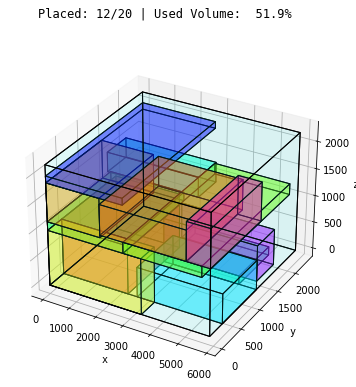

t_so_far  52
in evaluate , value function after critic  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       grad_fn=<SqueezeBackward0>)
after actor  tensor([[0.2435, 0.0000, 1.6817,  ..., 0.0000, 0.0000, 0.0000],
        [0.1513, 0.0000, 1.9676,  ..., 0.0000, 0.0000, 0.0000],
        [0.1067, 0.0000, 2.1929,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 6.4696,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 6.7271,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 6.7620,  ..., 0.0000, 0.0000, 0.0000]],
       grad_fn=<ReluBackward0>)
 after evaluate  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       grad_fn=<SqueezeBackward0>) tensor([ -2.5075,  -5.1021, -15.9424, -15.9424,  -2.0773, -15.9424, -15.9424,
        -15.9424, -15.9424,  -1.7414,  -1.8631,  -1.7445],
       grad_fn=<SqueezeBackward1>)
in evaluate , value function after critic  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       grad_fn=<SqueezeBackw

In [14]:
key = jax.random.PRNGKey(0)
env = jumanji.make("BinPack-toy-v0")
model = PPO(env)
model.learn(40)
#model.rollout()


Advantage function.
where Q^π is the Q-value of state action pair (s, a), and Vᵩₖ is the value of some observation s determined by our critic network following parameters Φ on the k-th iteration.

In [ ]:
# next steps
# save visualization after end of each batch 
# understand func learn middle part again
# tune hyperparameters